### 숫자인식은 딥러닝의 가장 기초적인 예제입니다. 

아래의 텐서플로우 공식싸이트의 예제를 참고하세요

https://www.tensorflow.org/tutorials/quickstart/beginner



In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [ ]:
type(x_train)

numpy.ndarray

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

* 데이터 살펴보기
  - 모델링을 하기에 앞서 데이터에 대해 확인하는 것이 중요합니다. 

In [5]:
import pandas as pd
y_train_df = pd.DataFrame(y_train)

In [6]:
type(y_train_df)

pandas.core.frame.DataFrame

In [8]:
# 데이터 개수가 불균형한지 확인
# 불균형한 경우에는 보완할 방법 필요

y_train_df.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [9]:
y_train_df.value_counts().sort_values()   # 값의 크기를 기준으로 정렬

5    5421
4    5842
8    5851
6    5918
0    5923
9    5949
2    5958
3    6131
7    6265
1    6742
dtype: int64

In [10]:
y_train_df.value_counts().sort_index()  # 인덱스 기준으로 정렬

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64

In [11]:
x_train[0]  # 첫번째 이미지 데이터

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [14]:
x_train[0].shape  # 흑백 이미지는 컬러 채널이 없음

(28, 28)

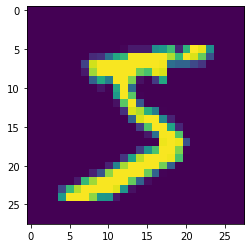

In [15]:
# 이미지 파일을 출력해보자
import matplotlib.pyplot as plt
plt.imshow(x_train[0])   # 컬러맵을 지정하지 않으면 흑백 이미지도 색상이 있는 것처럼 보임

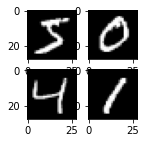

In [16]:
# 여러개 출력하기
# matplotlib의 subplot을 통해서 여러개 출력 가능
plt.figure(figsize=(2,2))
for i in range(4):
  plt.subplot(2,2,i+1)  # 몇번째 위치에 넣을 것인지 정해 줌
  plt.imshow(x_train[i], cmap='gray')

In [17]:
# 0~255 --> 0~1로 변환
x_train, x_test = x_train / 255.0, x_test / 255.0

In [18]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

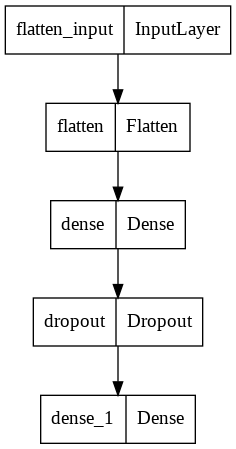

In [20]:
# plot_model함수를 활용하면 도식화된 모델 구성이 출력됨
tf.keras.utils.plot_model(model)

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
res = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 0.2960 - accuracy: 0.9149 - val_loss: 0.1442 - val_accuracy: 0.9571
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1444 - accuracy: 0.9577 - val_loss: 0.1002 - val_accuracy: 0.9706
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1090 - accuracy: 0.9665 - val_loss: 0.0911 - val_accuracy: 0.9723
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0868 - accuracy: 0.9737 - val_loss: 0.0771 - val_accuracy: 0.9751
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0746 - accuracy: 0.9758 - val_loss: 0.0800 - val_accuracy: 0.9758
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0645 - accuracy: 0.9797 - val_loss: 0.0739 - val_accuracy: 0.9788
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0589 - accuracy: 0.9809 - val_loss: 0.0745 - val_accuracy:

In [23]:
# .keys()를 활용해서 딕셔너리의 키값만 볼수 있음

res.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
res.history['loss']

[0.2960461378097534,
 0.14436429738998413,
 0.10898979008197784,
 0.08678147941827774,
 0.07460588216781616,
 0.06447866559028625,
 0.058902643620967865,
 0.05161276087164879,
 0.0489310547709465,
 0.04338016360998154]

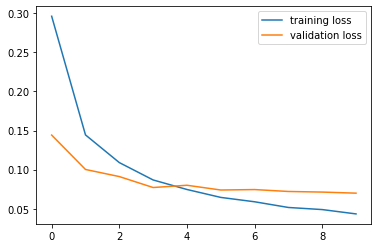

In [25]:
plt.plot(res.history['loss'], label='training loss')
plt.plot(res.history['val_loss'], label = 'validation loss')
plt.legend()